This a linear regression model applied on concrete strength dataset.
This is to show why linear mdels fail to fit on non-linear data

In [217]:
import torch
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [218]:
data = pd.read_csv('Concrete_Data.csv')
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [219]:
inputs = data.iloc[:, :-1]
target = data.iloc[:,-1]

In [220]:
scaler = StandardScaler()
inputs_scaled = scaler.fit_transform(inputs)

In [221]:
inputs_tensor = torch.tensor(inputs_scaled, dtype=torch.float32)
target_tensor = torch.tensor(target.values, dtype = torch.float32)

In [222]:
n_values = inputs_tensor.shape[0]
indices = torch.randperm(n_values)
split_index = int(n_values*0.8)

train_indices = indices[:split_index]
test_indices = indices[split_index:]

x_train = inputs_tensor[train_indices]
y_train = target_tensor[train_indices]
x_test = inputs_tensor[test_indices]
y_test = target_tensor[test_indices]

In [223]:
number_of_features = x_train.shape[1]
number_of_features

8

In [224]:
w = torch.randn((number_of_features,1), requires_grad=True)
b = torch.randn((1,), requires_grad=True)

In [225]:
def predict(X):
    return torch.matmul(X,w) + b

def mse_loss(prediction, target):
    return torch.mean((prediction-target)**2)

In [226]:
learning_rate = 0.01
epochs = 500

In [227]:
train_losses = []

In [ ]:
for epoch in range(epochs):
    y_pred = predict(x_train)

    loss = mse_loss(y_pred,y_train)

    loss.backward()

    with torch.no_grad():
        w -= learning_rate*w.grad
        b -= learning_rate*b.grad
    
    w.grad.zero_()
    b.grad.zero_()

    if (epoch+1)%10 == 0:
        print(f"Epoch: {epoch+1}, MSE: {loss}")

    train_losses.append(loss.item()) 

Epoch: 10, MSE: 1096.1512451171875
Epoch: 20, MSE: 821.9546508789062
Epoch: 30, MSE: 639.14990234375
Epoch: 40, MSE: 517.2031860351562
Epoch: 50, MSE: 435.8220520019531
Epoch: 60, MSE: 381.4962158203125
Epoch: 70, MSE: 345.2221374511719
Epoch: 80, MSE: 320.9951477050781
Epoch: 90, MSE: 304.8097229003906
Epoch: 100, MSE: 293.9927978515625
Epoch: 110, MSE: 286.7605285644531
Epoch: 120, MSE: 281.922119140625
Epoch: 130, MSE: 278.6827087402344
Epoch: 140, MSE: 276.511474609375
Epoch: 150, MSE: 275.0540771484375
Epoch: 160, MSE: 274.0738220214844
Epoch: 170, MSE: 273.4128112792969
Epoch: 180, MSE: 272.9653625488281
Epoch: 190, MSE: 272.6609802246094
Epoch: 200, MSE: 272.45257568359375
Epoch: 210, MSE: 272.30859375
Epoch: 220, MSE: 272.2079772949219
Epoch: 230, MSE: 272.13671875
Epoch: 240, MSE: 272.0852355957031
Epoch: 250, MSE: 272.0473327636719
Epoch: 260, MSE: 272.0186767578125
Epoch: 270, MSE: 271.9964904785156
Epoch: 280, MSE: 271.97882080078125
Epoch: 290, MSE: 271.9643249511719
Epoch

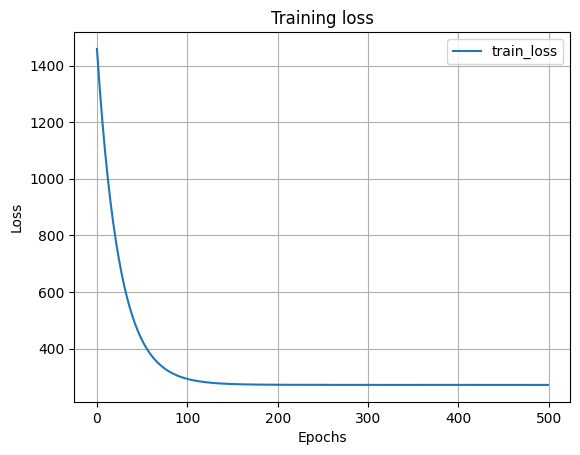

In [229]:
import matplotlib.pyplot as plt

plt.plot(train_losses, label= "train_loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training loss")
plt.grid(True)
plt.show()

In [230]:
y_test_pred = predict(x_test)
test_loss = mse_loss(y_test_pred, y_test).item()
print(f"Test MSE: {test_loss}")

Test MSE: 307.1005859375


In [231]:
print(f"Training Loss: {(train_losses[-1])**0.5}")
print(f"Testing Loss: {(test_loss)**0.5}")


Training Loss: 16.48802258962595
Testing Loss: 17.524285604197964


In [232]:
max_target_value = max(target)
min_target_value = min(target)
mean_target_value = target.mean()

In [233]:
print("Max target value: ", max_target_value)
print("Min target value: ", min_target_value)
print("Mean target value: ", mean_target_value)

Max target value:  82.6
Min target value:  2.33
Mean target value:  35.817961165048544


clearly the predictions are off from the real values by 16Mpa that is rougly around 45% deviation from true value.